Course: Intro to Computer Programming
Final Project
Decription: Global Coronvirus Cases within 2 months

In [201]:
import numpy as np
from numpy import mean, absolute
import statistics
from statistics import mode 
import pandas as pd
from pandas import ExcelFile

In [202]:
corona_path = '/Users/hubertnguyen/Desktop/time_series_2019-ncov-Confirmed.xls'
DF = pd.read_excel(corona_path, index = False)
print(DF)

     2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  \
0             2           3           5           7           8           8   
1             2           1           2           2           4           4   
2             0           1           3           3           4           5   
3             0           0           0           1           1           1   
4             0           0           0           3           4           4   
..          ...         ...         ...         ...         ...         ...   
161           0           0           0           0           0           0   
162           0           0           0           0           0           0   
163           0           0           0           0           0           0   
164           0           0           0           0           0           0   
165           0           0           0           0           0           0   

     2020-01-28  2020-01-29  2020-01-30  2020-01-31

America Cases within 10 days:
[ 1663  2179  2727  3499  4632  6421  7783 13677 19100 25489]
Summary of table
     Mean  Median    Max   Min  Range     MAD    Variance  Standard Deviation
0  8717.0  5526.5  25489  1663  23826  6423.0  59215145.4             7695.14


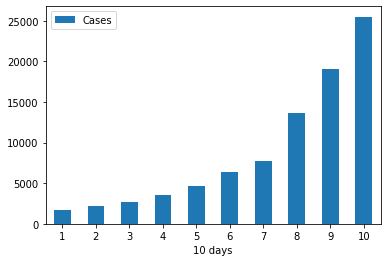

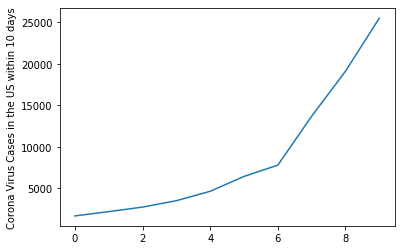

In [112]:
#US Cases within 10 days:
americacase = np.array([1663,2179,2727,3499,4632,6421,7783,13677,19100,25489])
print("America Cases within 10 days:")
print(americacase)
mean = np.mean(americacase)
median = np.median(americacase)
max = np.max(americacase)
min = np.min(americacase)
range1 = americacase.ptp()
series = pd.Series(americacase)
MAD = round(series.mad(),2)
var = round(np.var(americacase),2)
std = round(np.std(americacase),2)
dataFrame = {'Mean':[mean],'Median':[median],'Max':[max],'Min':[min],'Range':[range1],'MAD':[MAD],
            'Variance':[var],'Standard Deviation':[std]}
df = pd.DataFrame(dataFrame)
print("Summary of table")
print(df)
date = np.array([1,2,3,4,5,6,7,8,9,10])
df1 = pd.DataFrame({'Cases':americacase,'10 days':date})
ax = df1.plot.bar(x='10 days', y='Cases', rot=0)

import matplotlib.pyplot as plt
sqr_americacase = np.array(americacase**.5)
log_americacase = np.log(americacase)
plt.stackplot(americacase,sqr_americacase,log_americacase)
plt.show()
plt.close()
plt.plot(americacase)
plt.ylabel('Corona Virus Cases in the US within 10 days')
plt.show()


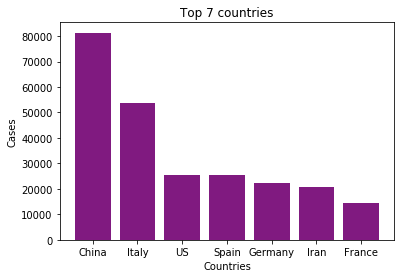

In [113]:
import numpy as np
import matplotlib.pyplot as plt
case = [81305, 53578, 25489, 25374, 22213, 20610, 14282]
country = ('China', 'Italy', 'US', 'Spain', 'Germany','Iran','France')
y_pos = np.arange(len(country))
plt.bar(y_pos, case, color = (0.5,0.1,0.5))
plt.title('Top 7 countries')
plt.xlabel('Countries')
plt.ylabel('Cases') 
plt.xticks(y_pos, country)
plt.show()

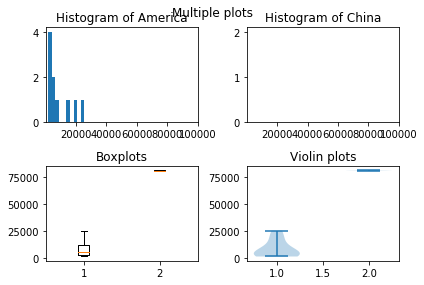

In [200]:
America = np.array([1663,2179,2727,3499,4632,6421,7783,13677,19100,25489])
China = np.array([80932,80945,80977,81003,81033,81058,81102,81156,81250,81305])

fig, axs = plt.subplots(2,2) #rows and columns
fig.suptitle('Multiple plots')

axs[0,0].hist(America)
axs[0,0].set_xlim(10,100000)
axs[0,0].set_title("Histogram of America")

axs[0,1].hist(China, color = 'orange')
axs[0,1].set_xlim(10,100000)
axs[0,1].set_title("Histogram of China")

axs[1,0].boxplot([America,China])
axs[1,0].set_title("Boxplots")

axs[1,1].violinplot([America,China])
axs[1,1].set_title("Violin plots")

plt.subplots_adjust(wspace=.5, hspace=0.2) #Adjusting spaces between plots

plt.tight_layout() #Help plot separations

plt.show()

# Description of Dataset: Corona Virus Cases Globally within 2 months

In [175]:
import pandas as pd
from sklearn.decomposition import PCA 

import seaborn as sns

In [184]:
corona_path = '/Users/hubertnguyen/Desktop/time_series_2019-ncov-Confirmed.xls'
Case = pd.read_excel(corona_path, index = False)
print('Object type:', type(Case))
np.set_printoptions(suppress=True)
print(Case.shape)
print(Case)

Object type: <class 'pandas.core.frame.DataFrame'>
(166, 60)
     2020-01-22  2020-01-23  2020-01-24  2020-01-25  2020-01-26  2020-01-27  \
0             2           3           5           7           8           8   
1             2           1           2           2           4           4   
2             0           1           3           3           4           5   
3             0           0           0           1           1           1   
4             0           0           0           3           4           4   
..          ...         ...         ...         ...         ...         ...   
161           0           0           0           0           0           0   
162           0           0           0           0           0           0   
163           0           0           0           0           0           0   
164           0           0           0           0           0           0   
165           0           0           0           0           0       

In [185]:
M = np.cov(Case)
print(np.round(M,2))

[[ 5691.45 19067.47  6773.68 ...     6.       6.       6.  ]
 [19067.47 96502.41 28922.47 ...    12.7     12.7     12.7 ]
 [ 6773.68 28922.47  9511.38 ...     5.6      5.6      5.6 ]
 ...
 [    6.      12.7      5.6  ...     0.02     0.02     0.02]
 [    6.      12.7      5.6  ...     0.02     0.02     0.02]
 [    6.      12.7      5.6  ...     0.02     0.02     0.02]]


In [187]:
Eigvalues, Eigvectors ,= np.linalg.eig(M) #Eigenveectors are in columns
print('\nEigenvalues:\n:',Eigvalues) #Weird result!!!Too many eigen values
print('\nEigenvectors:\n:',np.round(Eigvectors,2))


Eigenvalues:
: [ 1.00016781e+09+0.j  2.20240860e+08+0.j  8.54170611e+06+0.j
  1.21770070e+06+0.j  1.53095920e+05+0.j  7.50304247e+04+0.j
  2.81538100e+04+0.j  1.11246901e+04+0.j  8.44464561e+03+0.j
  6.28375351e+03+0.j  4.84906455e+03+0.j  1.66378973e+03+0.j
  7.52902577e+02+0.j  2.60295186e+02+0.j  2.27141906e+02+0.j
  1.60865136e+02+0.j  1.07927558e+02+0.j  6.82446075e+01+0.j
  5.25880863e+01+0.j  2.60949676e+01+0.j  1.62463101e+01+0.j
  1.17451178e+01+0.j  8.13641650e+00+0.j  6.64374893e+00+0.j
  3.95299052e+00+0.j  2.89664463e+00+0.j  1.97066878e+00+0.j
  1.37808892e+00+0.j  8.49358807e-01+0.j  7.53841883e-01+0.j
  5.38001938e-01+0.j  4.33867370e-01+0.j  2.92090433e-01+0.j
  2.20330816e-01+0.j  1.48903802e-01+0.j  1.30510898e-01+0.j
  1.04605931e-01+0.j  5.91343237e-02+0.j  3.83496123e-02+0.j
  2.73097987e-02+0.j  1.64850046e-02+0.j  1.18758007e-02+0.j
  1.02682112e-02+0.j  6.12416035e-03+0.j  4.03117231e-03+0.j
  2.92984756e-03+0.j  2.79091745e-03+0.j  1.37562465e-03+0.j
  1.0511

[0.94776399 0.04992053 0.00197202 0.00027719 0.00003489 0.00001694
 0.00000633 0.00000265 0.00000213 0.0000015  0.00000107 0.00000037
 0.00000016]


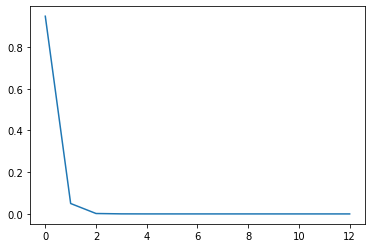

In [188]:
pca = PCA(n_components=13)
pca.fit(Case)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)

In [189]:
print(np.round(pca.components_,2))

[[ 0.    0.    0.    0.    0.    0.01  0.01  0.01  0.02  0.02  0.02  0.03
   0.04  0.05  0.05  0.06  0.07  0.07  0.08  0.08  0.09  0.09  0.12  0.13
   0.13  0.14  0.14  0.15  0.15  0.15  0.15  0.15  0.15  0.15  0.15  0.15
   0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16  0.16
   0.16  0.16  0.16  0.17  0.17  0.17  0.17  0.17  0.17  0.18  0.18  0.18]
 [-0.   -0.   -0.   -0.   -0.   -0.   -0.01 -0.01 -0.01 -0.01 -0.02 -0.02
  -0.03 -0.03 -0.04 -0.04 -0.05 -0.05 -0.06 -0.06 -0.06 -0.07 -0.09 -0.1
  -0.1  -0.1  -0.11 -0.11 -0.11 -0.11 -0.11 -0.11 -0.11 -0.11 -0.11 -0.11
  -0.11 -0.11 -0.1  -0.1  -0.09 -0.09 -0.08 -0.07 -0.06 -0.05 -0.04 -0.02
  -0.01  0.01  0.02  0.07  0.11  0.14  0.18  0.22  0.27  0.34  0.42  0.5 ]
 [-0.   -0.   -0.   -0.   -0.   -0.   -0.01 -0.01 -0.01 -0.02 -0.02 -0.03
  -0.03 -0.04 -0.05 -0.05 -0.06 -0.06 -0.07 -0.07 -0.08 -0.08 -0.1  -0.11
  -0.12 -0.12 -0.12 -0.13 -0.13 -0.13 -0.12 -0.12 -0.11 -0.11 -0.11 -0.1
  -0.08 -0.06 -0.04 -0.02  0.01  0.05 

In [191]:
pca = PCA(n_components=2) 
pca.fit(Case) 
CaseT = pca.transform(Case)
print(CaseT[0:10,...]) 

[[-3990.17115152 -1459.16551705]
 [-1979.41011449  -312.25129749]
 [-3559.39806659 -1425.64298831]
 [-4509.90814349 -1940.22024473]
 [-3234.58062231  -119.22028861]
 [-3457.63447763  -242.4341929 ]
 [-3497.66901888  -501.98367945]
 [-4468.95610243 -1861.735847  ]
 [-4446.66386522 -1820.08075917]
 [14848.76699081 30762.88619934]]


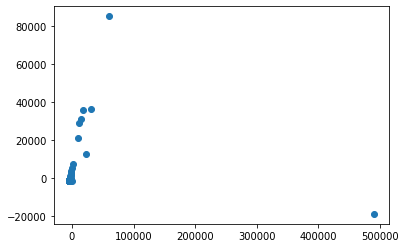

In [193]:
plt.scatter(CaseT[...,0],CaseT[...,1])

     Component 1  Component 2
0   -3990.171152 -1459.165517
1   -1979.410114  -312.251297
2   -3559.398067 -1425.642988
3   -4509.908143 -1940.220245
4   -3234.580622  -119.220289
..           ...          ...
161 -4515.974452 -1937.576936
162 -4516.515340 -1938.997137
163 -4516.515340 -1938.997137
164 -4516.515340 -1938.997137
165 -4516.515340 -1938.997137

[166 rows x 2 columns]


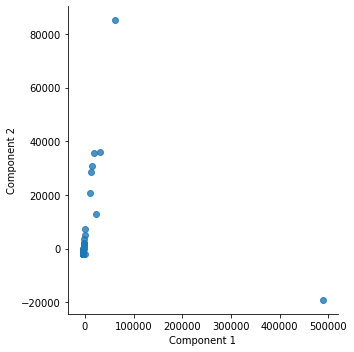

In [196]:
CaseFrame = pd.DataFrame({'Component 1': CaseT[:, 0], 'Component 2': CaseT[:, 1]})
print(CaseFrame)

sns.lmplot(x='Component 1',y='Component 2', data = CaseFrame, fit_reg=False)